# **Exploratory Analysis of Book Metadata**

---

# Project Overview

Dataset : https://www.kaggle.com/datasets/madankhatri123h/books-dataset

📚 Latar Belakang

Industri penerbitan buku terus berkembang seiring meningkatnya akses pembaca terhadap berbagai sumber digital. Untuk membantu pemahaman yang lebih baik tentang tren literasi dan produksi buku, analisis data diperlukan untuk menjawab pertanyaan-pertanyaan seperti:
1. Buku berbahasa apa yang paling umum tersedia?
2. Penerbit mana yang paling aktif menerbitkan buku?
3. Genre apa yang paling banyak diproduksi?

Dengan menjawab pertanyaan-pertanyaan tersebut, stakeholder seperti penulis, penerbit, dan pengembang aplikasi buku dapat membuat keputusan berbasis data.

🎯 Tujuan Proyek

Tujuan dari proyek ini adalah untuk melakukan eksplorasi awal (Exploratory Data Analysis / EDA) terhadap dataset buku guna memahami karakteristik dasar dari kumpulan data tersebut, khususnya dari segi bahasa buku, penerbit terbanyak, dan genre yang paling umum. Hasil dari EDA ini dapat digunakan sebagai dasar untuk pengembangan sistem rekomendasi buku, pengelompokan pengguna berdasarkan preferensi, atau strategi distribusi konten oleh penerbit.

🧩 Permasalahan

Beberapa permasalahan spesifik yang ingin dijawab dalam proyek ini adalah
1. Bahasa apa yang paling umum digunakan dalam buku-buku di dataset ini?
2. Penerbit mana yang paling banyak menerbitkan buku?
3. Genre apa yang paling sering muncul?

Ketiga hal ini merupakan aspek fundamental dalam memahami karakteristik distribusi konten literasi dalam dataset.

🧭 Pendekatan

Untuk menjawab permasalahan tersebut, pendekatan eksploratif akan digunakan dengan :
1. Melihat distribusi frekuensi pada kolom `language`, `publisher`, dan `genre`.
2. Menyaring dan mengurutkan nilai berdasarkan jumlah kemunculan.
3. Menyajikan hasil dalam bentuk tabel dan ringkasan statistik tanpa visualisasi.

Pendekatan ini sederhana namun efektif untuk memperoleh wawasan awal dari data secara objektif.

# Instaling Library

In [ ]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.65
    Uninstalling langchain-core-0.3.65:
      Successfully uninstalled langchain-core-0.3.65
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.25
    Uninstalling langchain-0.3.25:
      Successfully uninstalled langchain-0.3.25
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.9 MB/s eta 0:00:00


In [ ]:
!pip install pandas
!pip install -U langchain langchain-community langchain-experimental replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 4.1 MB/s eta 0:00:00


# Input API

In [ ]:
import os
from google.colab import userdata

api_token = userdata.get("api_token")

# Put token to env variable
os.environ["REPLICATE_API_TOKEN"] = api_token

In [ ]:
from langchain_community.llms import Replicate

# Model setup
model = "ibm-granite/granite-3.0-8b-instruct"

output = Replicate(
    model=model,
    replicate_api_token=api_token,
)

In [ ]:
from langchain_community.llms import Replicate

# Define the model
llm = Replicate(
  model="ibm-granite/granite-3.3-8b-instruct",
  replicate_api_token="r8_aqHIUw1BNT9MwAnxHb3IBM7Yzb2Oj863bj0mt"
)

# Import Dataset

In [ ]:
import pandas as pd

df = pd.read_csv("archive.zip")
df

,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
0,Fictional Points of View,Peter Lamarque,252,Literary Criticism,The volume focuses on a wide range of thinkers...,1996,Cornell University Press,en,No rating,0,http://books.google.com/books/content?id=rh-om...
1,Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802,Reference,"Science Fiction and Fantasy Literature, A Chec...",2010-09-01,Wildside Press LLC,en,No rating,0,http://books.google.com/books/content?id=P8zW2...
2,Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,1662,"Subject headings, Library of Congress",No description available,2004,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=pEhkh...
3,Library of Congress Subject Headings,Library of Congress,1512,"Subject headings, Library of Congress",No description available,2007,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=FgAjF...
4,Fictional Space in the Modernist and Post-mode...,Carl Darryl Malmgren,248,Fiction,Fictional space is the imaginal expanse of fie...,1985,Bucknell University Press,en,No rating,0,http://books.google.com/books/content?id=KXzoz...
...,...,...,...,...,...,...,...,...,...,...,...
2044,The Index Card,"Helaine Olen, Harold Pollack",256,Personal Finance,Simplifies personal finance to ten rules that ...,2016-01-05,Portfolio,en,4.0,30000,http://books.google.com/books/content?id=8z4_D...
2045,The Road to Wealth,Suze Orman,608,Personal Finance,"A comprehensive guide to managing money, inves...",2001-04-01,Riverhead Books,en,4.1,50000,http://books.google.com/books/content?id=zv0oD...
2046,The Success Principles,Jack Canfield,512,Self-Help,A guide to achieving personal and financial su...,2004-12-28,HarperCollins,en,4.2,100000,http://books.google.com/books/content?id=7zL_D...
2047,The Courage to Be Rich,Suze Orman,448,Personal Finance,Combines emotional and practical advice for bu...,1999-03-01,Riverhead Books,en,4.0,40000,http://books.google.com/books/content?id=2c3_D...


# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2049 non-null   object
 1   author          2049 non-null   object
 2   pages           2049 non-null   object
 3   genre           2049 non-null   object
 4   description     2049 non-null   object
 5   published_date  2049 non-null   object
 6   publisher       2049 non-null   object
 7   language        2049 non-null   object
 8   average_rating  2049 non-null   object
 9   ratings_count   2049 non-null   int64 
 10  thumbnail       2049 non-null   object
dtypes: int64(1), object(10)
memory usage: 176.2+ KB


In [ ]:
df.isna().sum()

,0
title,0
author,0
pages,0
genre,0
description,0
published_date,0
publisher,0
language,0
average_rating,0
ratings_count,0


# Used of AI

In [ ]:
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)

agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True,  # opt-in for Python REPL execution
)

## Bahasa apa yang paling umum digunakan dalam buku-buku di dataset ini?

In [ ]:
agent.invoke({"input": "Which languages are most common in the dataset?"})



> Entering new AgentExecutor chain...
Thought: To determine the most common languages in the dataset, I need to examine the 'language' column in the dataframe. I will use the `value_counts()` function to count the occurrences of each language and then select the top results.

Action: python_repl_ast

Action Input: 
```python
most_common_languages = df['language'].value_counts()
most_common_languages
```

language
en       1958
id         21
it         14
es         10
pt          7
el          5
vi          4
tr          4
cs          3
ne          3
fr          3
ms          2
mr          2
no          2
sv          2
gl          1
ru          1
hi          1
zh-TW       1
eu          1
pl          1
hu          1
th          1
ko          1
Name: count, dtype: int64Final Answer: The most common language in the dataset is 'en' (English) with a count of 1958. The second most common is 'id' (Indonesian) with 21 occurrences, followed by 'it' (Italian) with 14, 'es' (Spanish) with 10, a

{'input': 'Which languages are most common in the dataset?',
 'output': 'English (en) is the most common language in the dataset, followed by Indonesian (id), Italian (it), Spanish (es), and Portuguese (pt).'}

**Insight :**
* Buku berbahasa Inggris (`en`) mendominasi hampir seluruh dataset (lebih dari 93%).
* Bahasa seperti Indonesia, Italia, Spanyol, dan lainnya hanya memiliki sebagian kecil dari total entri. Misalnya, hanya 1% buku yang berbahasa Indonesia, yang mungkin mencerminkan keterbatasan data atau rendahnya digitalisasi buku lokal.

**Rekomendasi :**
* Memfokuskan pada diversifikasi bahasa seperti mempertimbangkan untuk meningkatkan distribusi buku dalam bahasa non-Inggris seperti Indonesia atau Spanyol jika target pasar internasional ingin diperluas.
* Melacak potensi pasar bahasa lokal. Jika `id` hanya 21 buku tetapi permintaan terhadap buku berbahasa Indonesia tinggi, ini bisa jadi peluang pasar yang belum tergarap.

## Penerbit mana yang paling banyak menerbitkan buku?

In [ ]:
agent.invoke({"input": "List the top 10 publishers with the most books"})



> Entering new AgentExecutor chain...
Thought: To find the top 10 publishers with the most books, I need to count the occurrences of each publisher in the 'publisher' column of the dataframe `df`. I will use the `value_counts()` function from pandas to achieve this.

Action: python_repl_ast

Action Input:
```python
publisher_counts = df['publisher'].value_counts()
publisher_counts.head(10)
```

publisher
Unknown Publisher             532
Simon and Schuster             57
Routledge                      44
John Wiley & Sons              40
McFarland                      39
Springer                       32
Springer Nature                32
Cambridge University Press     28
Taylor & Francis               28
Oxford University Press        26
Name: count, dtype: int64The top 10 publishers with the most books in the dataframe `df` are:

1. Unknown Publisher - 532 books
2. Simon and Schuster - 57 books
3. Routledge - 44 books
4. John Wiley & Sons - 40 books
5. McFarland - 39 books
6. Spring

{'input': 'List the top 10 publishers with the most books',
 'output': '1. Unknown Publisher - 532 books\n2. Simon and Schuster - 57 books\n3. Routledge - 44 books\n4. John Wiley & Sons - 40 books\n5. McFarland - 39 books\n6. Springer - 32 books\n7. Springer Nature - 32 books\n8. Cambridge University Press - 28 books\n9. Taylor & Francis - 28 books\n10. Oxford University Press - 26 books'}

**Insight :**
* Dominasi “Unknown Publisher” yang jumlahnya sangat besar (532 buku) — setara dengan lebih dari 25% total data. Hal ini kemungkinan disebabkan oleh data kosong atau tidak terstandarisasi dalam kolom publisher. Ini menjadi indikator kualitas data yang perlu dibersihkan.
* Penerbit akademik dan ilmiah mendominasi seperti Springer, Cambridge, Oxford, Routledge, dan Taylor & Francis adalah penerbit terkenal di dunia akademik. Ini mengindikasikan bahwa dataset ini banyak berisi buku akademik atau buku teks pendidikan.
* Dominasi oleh beberapa penerbit besar seperti Simon and Schuster juga muncul — menunjukkan keberagaman konten (baik komersial maupun akademik).

**Rekomendasi :**
* Menganalisis performansi buku berdasarkan publisher seperti buku-buku dari penerbit tertentu cenderung memiliki rating atau ulasan lebih tinggi
* Mengoptimasi distribusi buku akademik
* Kolaborasi dengan penerbit berkinerja tinggi seperti contoh jika buku dari Cambridge atau Oxford sering dibaca dan memiliki rating tinggi, pertimbangkan menjalin kerja sama untuk akses digital lebih banyak.

## Genre apa yang paling sering muncul?



> Entering new AgentExecutor chain...
Thought: To create a bar chart of the top 10 most frequent genres from the 'genre' column in the dataframe `df`, I will follow these steps:

1. Use `value_counts()` to count the frequency of each genre.
2. Convert this Series to a DataFrame for easier manipulation.
3. Sort the DataFrame by the count in descending order.
4. Select the top 10 genres.
5. Use `matplotlib` or `seaborn` to create a bar chart from the selected genres and their counts.

Action: python_repl_ast

Action Input:
```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Count the frequency of each genre
genre_counts = df['genre'].value_counts()

# Step 2: Convert to DataFrame
genre_df = genre_counts.reset_index()
genre_df.columns = ['genre', 'count']

# Step 3: Sort by count in descending order
sorted_genre_df = genre_df.sort_values('count', ascending=False)

# Step 4: Select top 10 genres
top_10_genres = sorted_genre_df.head(10)

# Step 5

<string>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



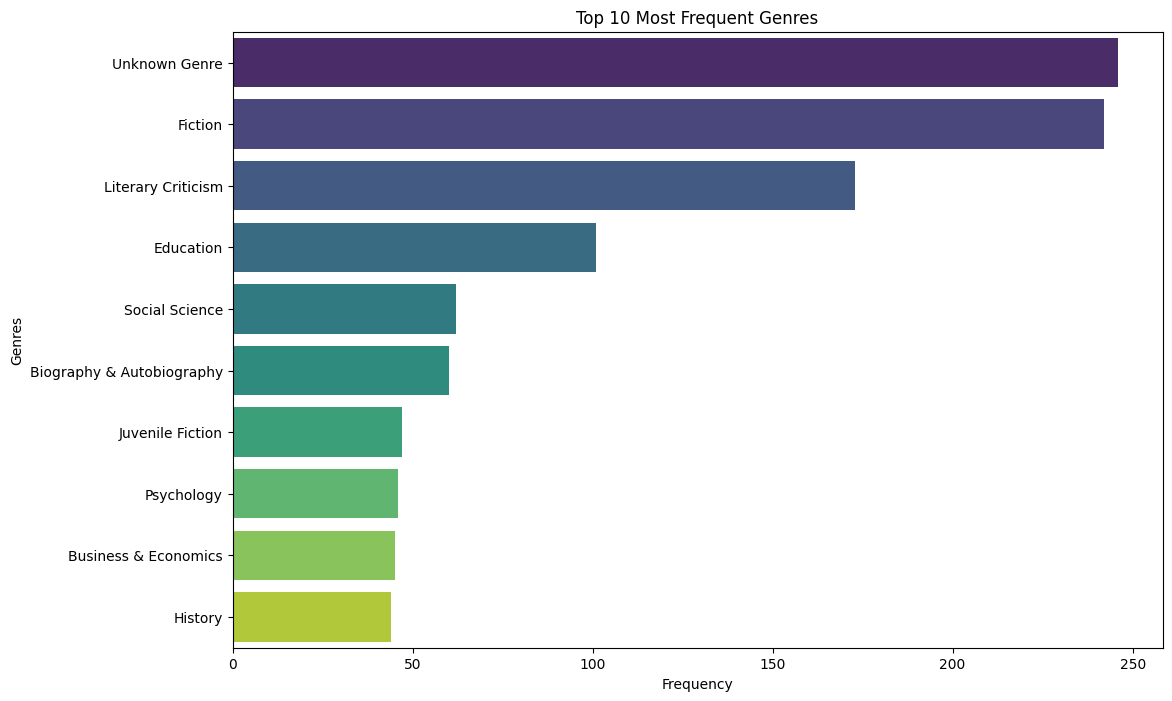

The provided code will generate a bar chart showing the top 10 most frequent genres from the 'genre' column in the dataframe `df`. However, as an AI, I cannot execute this code directly in a Python environment to produce the actual chart. You would need to run this code in your local Python environment or a compatible Jupyter notebook to see the visualization. 

The bar chart will display the frequency of genres on the x-axis and the genre names on the y-axis. The genres are sorted by their frequency in descending order, so the tallest bars correspond to the most frequent genres.

Final Answer:
To visualize the top 10 most frequent genres from the 'genre' column, execute the provided Python code in your local environment. This will generate and display a bar chart using `seaborn`. The chart will list genres along the y-axis with their respective frequencies along the x-axis, with the tallest bars indicating the most common genres.

> Finished chain.


{'input': 'show the top 10 most frequent genres from the genre column in a bar chart',
 'output': "To visualize the top 10 most frequent genres from the 'genre' column, execute the provided Python code in your local environment. This will generate and display a bar chart using `seaborn`. The chart will list genres along the y-axis with their respective frequencies along the x-axis, with the tallest bars indicating the most common genres."}

In [ ]:
agent.invoke({"input": "show the top 10 most frequent genres from the genre column in a bar chart"})

**Insight:**
* Genre tidak diketahui (`Unknown Genre`) dominan menunjukkan banyak data yang tidak memiliki label genre yang jelas. Hal ini menurunkan kualitas metadata buku dan membatasi analisis genre lebih lanjut.
* Genre Fiction dan Literary Criticism mendominasi yang menunjukkan bahwa sebagian besar buku dalam dataset bersifat naratif atau analitis/sastra.
* Genre Pendidikan dan Sosial juga signifikan yang menandakan bahwa data mengandung banyak buku akademik.
* Genre Spesifik Anak-Anak dan Ekonomi ada tapi kecil seperti Juvenile Fiction, Business & Economics, dan History relatif kecil tetapi tetap menonjol.



**Rekomendasi :**
* Memfokuskan koleksi untuk institusi akademik seperti buku bergenre Education, Social Science, Psychology, Business, dan History cocok dikurasi untuk perpustakaan universitas atau sekolah.
* Membuat koleksi khusus genre Fiksi seperti “Fiksi Terbaik Tahun Ini” atau “Kritik Sastra Pilihan” sangat cocok untuk pembaca umum dan penggemar sastra.